# Analyzing S & P robot data

## Import libraries

In [34]:
import os, os.path

In [35]:
from skimage import io,util

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime

In [37]:
data_file =  'MTX_selection2_20221011_pyphe_output_2022-12-09_Cterm.csv'




In [38]:
data_df = pd.read_csv(data_file,index_col=0)

/Users/danyamamotoevans/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [39]:
data_df.head()

,area,centroid,mean_intensity,perimeter,row,column,circularity,plate_number,spot_well,RA_well
1,2159,"(43.44881889763779, 582.4525243168133)",0.433300,175.781746,1,7,0.878041,d000263_300_011_22-10-07_20-52-48,A7,A4
2,2247,"(45.522474410324875, 758.2149532710281)",0.436059,176.367532,1,9,0.907770,d000263_300_011_22-10-07_20-52-48,A9,A5
3,2118,"(44.11331444759207, 2157.5391879131257)",0.453158,171.781746,1,25,0.901949,d000263_300_011_22-10-07_20-52-48,A25,A13
4,2075,"(43.406746987951806, 2509.938313253012)",0.452203,170.953319,1,29,0.892222,d000263_300_011_22-10-07_20-52-48,A29,A15
5,2133,"(44.61744022503516, 1021.6160337552743)",0.440047,170.953319,1,12,0.917161,d000263_300_011_22-10-07_20-52-48,A12,A6


In [40]:
data_df2 = data_df.drop(columns=['centroid','mean_intensity','perimeter','circularity','RA_well'])

In [41]:
data_df2.head()

,area,row,column,plate_number,spot_well
1,2159,1,7,d000263_300_011_22-10-07_20-52-48,A7
2,2247,1,9,d000263_300_011_22-10-07_20-52-48,A9
3,2118,1,25,d000263_300_011_22-10-07_20-52-48,A25
4,2075,1,29,d000263_300_011_22-10-07_20-52-48,A29
5,2133,1,12,d000263_300_011_22-10-07_20-52-48,A12


In [42]:
data_df2[['Experiment_ID','Image_Batch', 'Plate_ID','Date','Time']] = data_df2['plate_number'].str.split('_', 4, expand=True)
data_df2.head()

,area,row,column,plate_number,spot_well,Experiment_ID,Image_Batch,Plate_ID,Date,Time
1,2159,1,7,d000263_300_011_22-10-07_20-52-48,A7,d000263,300,011,22-10-07,20-52-48
2,2247,1,9,d000263_300_011_22-10-07_20-52-48,A9,d000263,300,011,22-10-07,20-52-48
3,2118,1,25,d000263_300_011_22-10-07_20-52-48,A25,d000263,300,011,22-10-07,20-52-48
4,2075,1,29,d000263_300_011_22-10-07_20-52-48,A29,d000263,300,011,22-10-07,20-52-48
5,2133,1,12,d000263_300_011_22-10-07_20-52-48,A12,d000263,300,011,22-10-07,20-52-48


In [43]:
#dox_sel2 = data_df2[data_df2.Experiment_ID=="d000265"]
#dox_sel3 = data_df2[data_df2.Experiment_ID=="d000266"]

In [44]:
data_df3 = data_df2.drop(columns=['plate_number','Image_Batch'])

In [45]:
data_df3['Date'] = '20' + data_df3['Date'].astype(str)

In [46]:
cols = ['Date', 'Time']
data_df3['Date_Time'] =  data_df3[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
data_df3.head()

,area,row,column,spot_well,Experiment_ID,Plate_ID,Date,Time,Date_Time
1,2159,1,7,A7,d000263,011,2022-10-07,20-52-48,2022-10-07_20-52-48
2,2247,1,9,A9,d000263,011,2022-10-07,20-52-48,2022-10-07_20-52-48
3,2118,1,25,A25,d000263,011,2022-10-07,20-52-48,2022-10-07_20-52-48
4,2075,1,29,A29,d000263,011,2022-10-07,20-52-48,2022-10-07_20-52-48
5,2133,1,12,A12,d000263,011,2022-10-07,20-52-48,2022-10-07_20-52-48


In [47]:
data_df3['TimeFormat'] =  pd.to_datetime(data_df3['Date_Time'], format='%Y-%m-%d_%H-%M-%S')

In [48]:
data_df3.head()

,area,row,column,spot_well,Experiment_ID,Plate_ID,Date,Time,Date_Time,TimeFormat
1,2159,1,7,A7,d000263,011,2022-10-07,20-52-48,2022-10-07_20-52-48,2022-10-07 20:52:48
2,2247,1,9,A9,d000263,011,2022-10-07,20-52-48,2022-10-07_20-52-48,2022-10-07 20:52:48
3,2118,1,25,A25,d000263,011,2022-10-07,20-52-48,2022-10-07_20-52-48,2022-10-07 20:52:48
4,2075,1,29,A29,d000263,011,2022-10-07,20-52-48,2022-10-07_20-52-48,2022-10-07 20:52:48
5,2133,1,12,A12,d000263,011,2022-10-07,20-52-48,2022-10-07_20-52-48,2022-10-07 20:52:48


In [49]:
cols = ['Experiment_ID','Plate_ID', 'spot_well']
data_df3['Sample_ID'] =  data_df3[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
data_df3.head()

,area,row,column,spot_well,Experiment_ID,Plate_ID,Date,Time,Date_Time,TimeFormat,Sample_ID
1,2159,1,7,A7,d000263,011,2022-10-07,20-52-48,2022-10-07_20-52-48,2022-10-07 20:52:48,d000263_011_A7
2,2247,1,9,A9,d000263,011,2022-10-07,20-52-48,2022-10-07_20-52-48,2022-10-07 20:52:48,d000263_011_A9
3,2118,1,25,A25,d000263,011,2022-10-07,20-52-48,2022-10-07_20-52-48,2022-10-07 20:52:48,d000263_011_A25
4,2075,1,29,A29,d000263,011,2022-10-07,20-52-48,2022-10-07_20-52-48,2022-10-07 20:52:48,d000263_011_A29
5,2133,1,12,A12,d000263,011,2022-10-07,20-52-48,2022-10-07_20-52-48,2022-10-07 20:52:48,d000263_011_A12


In [50]:
experiment_dict = {"d000263":"MTX_2"}
data_df3['Selection'] = data_df3['Experiment_ID'].map(experiment_dict)

In [51]:
data_df3.head()

,area,row,column,spot_well,Experiment_ID,Plate_ID,Date,Time,Date_Time,TimeFormat,Sample_ID,Selection
1,2159,1,7,A7,d000263,011,2022-10-07,20-52-48,2022-10-07_20-52-48,2022-10-07 20:52:48,d000263_011_A7,MTX_2
2,2247,1,9,A9,d000263,011,2022-10-07,20-52-48,2022-10-07_20-52-48,2022-10-07 20:52:48,d000263_011_A9,MTX_2
3,2118,1,25,A25,d000263,011,2022-10-07,20-52-48,2022-10-07_20-52-48,2022-10-07 20:52:48,d000263_011_A25,MTX_2
4,2075,1,29,A29,d000263,011,2022-10-07,20-52-48,2022-10-07_20-52-48,2022-10-07 20:52:48,d000263_011_A29,MTX_2
5,2133,1,12,A12,d000263,011,2022-10-07,20-52-48,2022-10-07_20-52-48,2022-10-07 20:52:48,d000263_011_A12,MTX_2


In [52]:
data_df4 = data_df3.drop(columns=['Date','Time','Date_Time','Experiment_ID'])

In [53]:
#data_df4.groupby("Sample_ID")["TimeFormat"].transform(min)

In [54]:
data_df4["Time_incubation"] = data_df4["TimeFormat"]
data_df4["Time_incubation"] -= data_df4.groupby("Sample_ID")["TimeFormat"].transform(min)

In [55]:
data_df4.head()

,area,row,column,spot_well,Plate_ID,TimeFormat,Sample_ID,Selection,Time_incubation
1,2159,1,7,A7,011,2022-10-07 20:52:48,d000263_011_A7,MTX_2,2 days 01:59:19
2,2247,1,9,A9,011,2022-10-07 20:52:48,d000263_011_A9,MTX_2,2 days 01:59:19
3,2118,1,25,A25,011,2022-10-07 20:52:48,d000263_011_A25,MTX_2,2 days 01:59:19
4,2075,1,29,A29,011,2022-10-07 20:52:48,d000263_011_A29,MTX_2,2 days 01:59:19
5,2133,1,12,A12,011,2022-10-07 20:52:48,d000263_011_A12,MTX_2,2 days 01:59:19


In [56]:
#data_df4['Hour_incubation'] = round(data_df4['Time_incubation'].total_seconds() / 3600)
data_df4['Hour_incubation'] =  data_df4['Time_incubation']/ pd.Timedelta(hours=1)

data_df4.head()

,area,row,column,spot_well,Plate_ID,TimeFormat,Sample_ID,Selection,Time_incubation,Hour_incubation
1,2159,1,7,A7,011,2022-10-07 20:52:48,d000263_011_A7,MTX_2,2 days 01:59:19,49.988611
2,2247,1,9,A9,011,2022-10-07 20:52:48,d000263_011_A9,MTX_2,2 days 01:59:19,49.988611
3,2118,1,25,A25,011,2022-10-07 20:52:48,d000263_011_A25,MTX_2,2 days 01:59:19,49.988611
4,2075,1,29,A29,011,2022-10-07 20:52:48,d000263_011_A29,MTX_2,2 days 01:59:19,49.988611
5,2133,1,12,A12,011,2022-10-07 20:52:48,d000263_011_A12,MTX_2,2 days 01:59:19,49.988611


In [57]:
test_data = data_df4[data_df4.Plate_ID=="001"]
test_data2 = test_data[test_data.row==10]

In [58]:
#test_data2[test_data2.index.duplicated()]
test_data2.reset_index(level=0, inplace=True)
test_data2

,index,area,row,column,spot_well,Plate_ID,TimeFormat,Sample_ID,Selection,Time_incubation,Hour_incubation
0,248,1302,10,1,J1,001,2022-10-08 02:45:50,d000263_001_J1,MTX_2,2 days 07:59:21,55.989167
1,249,1276,10,2,J2,001,2022-10-08 02:45:50,d000263_001_J2,MTX_2,2 days 07:59:21,55.989167
2,250,2839,10,31,J31,001,2022-10-08 02:45:50,d000263_001_J31,MTX_2,2 days 07:59:21,55.989167
3,251,1397,10,47,J47,001,2022-10-08 02:45:50,d000263_001_J47,MTX_2,2 days 07:59:21,55.989167
4,252,1402,10,48,J48,001,2022-10-08 02:45:50,d000263_001_J48,MTX_2,2 days 07:59:21,55.989167
...,...,...,...,...,...,...,...,...,...,...,...
1518,290,68,10,37,J37,001,2022-10-07 22:45:46,d000263_001_J37,MTX_2,2 days 03:59:17,51.988056
1519,291,107,10,30,J30,001,2022-10-07 22:45:46,d000263_001_J30,MTX_2,2 days 03:59:17,51.988056
1520,292,80,10,40,J40,001,2022-10-07 22:45:46,d000263_001_J40,MTX_2,2 days 03:59:17,51.988056
1521,293,74,10,41,J41,001,2022-10-07 22:45:46,d000263_001_J41,MTX_2,2 days 03:59:17,51.988056


<AxesSubplot:xlabel='Hour_incubation', ylabel='area'>

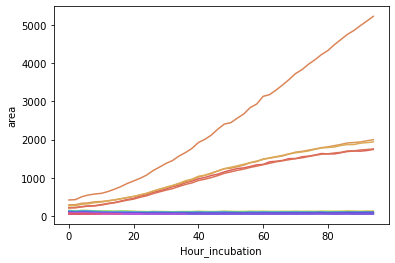

In [59]:
data = test_data2
sns.lineplot(data=test_data2,x='Hour_incubation', y='area', legend=False, hue='Sample_ID', palette='hls')


In [60]:
def get_auc(g):
    return np.trapz(g.area)

aucdf = data_df4.groupby(['Selection','Plate_ID','spot_well'])[['area']].apply(func=get_auc).reset_index(name='auc')
full_df = data_df4.merge(right=aucdf, on=['Selection','Plate_ID','spot_well'])

full_df.head()


,area,row,column,spot_well,Plate_ID,TimeFormat,Sample_ID,Selection,Time_incubation,Hour_incubation,auc
0,2159,1,7,A7,011,2022-10-07 20:52:48,d000263_011_A7,MTX_2,2 days 01:59:19,49.988611,89242.5
1,931,1,7,A7,011,2022-10-06 00:52:49,d000263_011_A7,MTX_2,0 days 05:59:20,5.988889,89242.5
2,1708,1,7,A7,011,2022-10-07 02:52:47,d000263_011_A7,MTX_2,1 days 07:59:18,31.988333,89242.5
3,2529,1,7,A7,011,2022-10-09 12:52:44,d000263_011_A7,MTX_2,3 days 17:59:15,89.987500,89242.5
4,2491,1,7,A7,011,2022-10-09 06:52:45,d000263_011_A7,MTX_2,3 days 11:59:16,83.987778,89242.5


In [61]:
data_auc = full_df.drop(columns=['Sample_ID','Time_incubation','Hour_incubation','TimeFormat','area'])

In [62]:
data_auc.head()

,row,column,spot_well,Plate_ID,Selection,auc
0,1,7,A7,011,MTX_2,89242.5
1,1,7,A7,011,MTX_2,89242.5
2,1,7,A7,011,MTX_2,89242.5
3,1,7,A7,011,MTX_2,89242.5
4,1,7,A7,011,MTX_2,89242.5


In [63]:
len(data_auc)

2353716

In [64]:
data_auc_unique = data_auc.drop_duplicates()

In [65]:
len(data_auc_unique)

56610

In [66]:
data_auc_unique.to_csv("2022-12-09_MTX_Sel2_AUC_data_Cterm.csv",index=None)

